In [1]:
# loading relevant libraries for model development, data manipution and visualization

# loading data manipulation tool
import pandas as pd
import numpy as np
import pickle
from collections import Counter

# Data visualization tool
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

# loading model performance lib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss

# preprocessing lib
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# handling data imbalance
from imblearn.over_sampling import ADASYN, SMOTE

# loading algorithm
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model , save_model

**Data Understanding**

In [2]:
# loading datasets
df = pd.read_csv("train.csv")

In [3]:
# Return the first 5 rows.
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home OwnerShip,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
# Return a tuple representing the dimensionality of the DataFrame.
df.shape

(67463, 35)

In [5]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Home OwnerShip                67463 non-null  object 
 10  Employment Duration           67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [6]:
# return number of missing value present
df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home OwnerShip                  0
Employment Duration             0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [7]:
# Return a Series containing counts of unique rows in the DataFrame.
df['Loan Status'].value_counts()

# Datasets is highly imbalance

0    61222
1     6241
Name: Loan Status, dtype: int64

In [8]:
# Return a Series containing counts of unique rows in the DataFrame.
df['Verification Status'].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

In [9]:
# Return a Series containing counts of unique rows in the DataFrame.
df['Home OwnerShip'].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Home OwnerShip, dtype: int64

**Eploratory Data Analysis**

<AxesSubplot:title={'center':"Customer's Loan Status."}, xlabel='Loan Status', ylabel='count'>

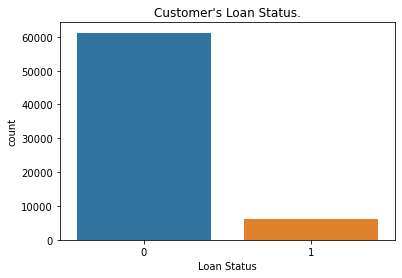

In [10]:
plt.title("Customer's Loan Status.")
sns.countplot(data=df, x='Loan Status')

<AxesSubplot:title={'center':"Customer's Home Ownership by Loan Status."}, xlabel='Home OwnerShip', ylabel='count'>

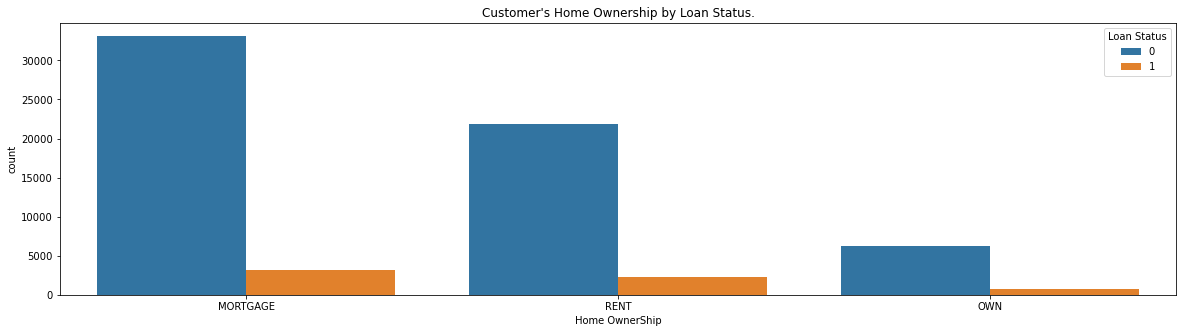

In [11]:
plt.figure(figsize=(20,5))
plt.title("Customer's Home Ownership by Loan Status.")
sns.countplot(data=df, x='Home OwnerShip', hue='Loan Status')

<AxesSubplot:title={'center':'Customers Verify Status by Loan Status.'}, xlabel='Verification Status', ylabel='count'>

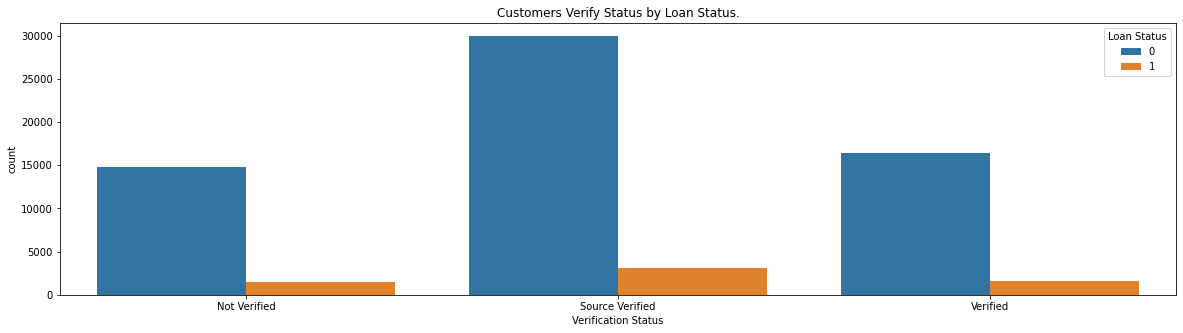

In [12]:
plt.figure(figsize=(20,5))
plt.title("Customers Verify Status by Loan Status.")
sns.countplot(data=df, x='Verification Status', hue='Loan Status')

<AxesSubplot:title={'center':"Customer's Home OwnerShip."}, xlabel='Home OwnerShip', ylabel='count'>

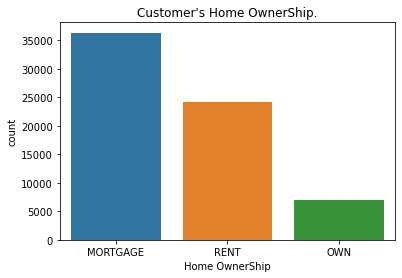

In [13]:
plt.title("Customer's Home OwnerShip.")
sns.countplot(data=df, x='Home OwnerShip')

<AxesSubplot:title={'center':"Customer's Delinquency in last two years."}, xlabel='Delinquency - two years', ylabel='count'>

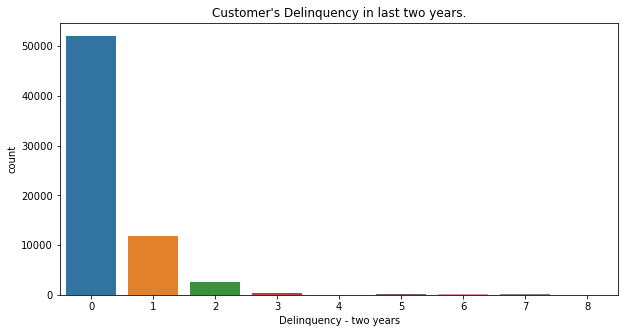

In [14]:
plt.figure(figsize=(10,5))
plt.title("Customer's Delinquency in last two years.")
sns.countplot(data=df, x='Delinquency - two years')

In [15]:
# Generate a profile report from a Dataset
#profile = ProfileReport(df=df, explorative=True)
#profile.to_widgets()

**Data Cleaning and Preprocessing**

1. Drop inrelevant columns


In [16]:
# Drop specified labels from rows or columns.
df = df.drop(['ID'], axis=1)

**Encoding Categorical Variables into numberical using Labelencoder**

In [17]:
# Encode target labels
df['Batch Enrolled'] = LabelEncoder().fit_transform(df['Batch Enrolled'])
df['Grade'] = LabelEncoder().fit_transform(df['Grade'])
df['Sub Grade'] = LabelEncoder().fit_transform(df['Sub Grade'])
df['Home OwnerShip'] = LabelEncoder().fit_transform(df['Home OwnerShip'])
df['Verification Status'] = LabelEncoder().fit_transform(df['Verification Status'])
df['Payment Plan'] = LabelEncoder().fit_transform(df['Payment Plan'])
df['Loan Title'] = LabelEncoder().fit_transform(df['Loan Title'])
df['Initial List Status'] = LabelEncoder().fit_transform(df['Initial List Status'])
df['Application Type'] = LabelEncoder().fit_transform(df['Application Type'])

In [18]:
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home OwnerShip,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0,0,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0,0,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0,0,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0,0,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0,0,18,0,430,126029,22579,0


In [19]:
# assign feature i.e independent variable to X and target variable to y i.e dependent
X = df.drop(['Loan Status'], axis=1)
y = df['Loan Status']

**Splitting Data into train and valid for Model Development**



In [20]:
# Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=2021)
# Split arrays into validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [21]:
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.908468
1    0.091532
Name: Loan Status, dtype: float64
0    0.907505
1    0.092495
Name: Loan Status, dtype: float64


In [22]:
# Scale features using statistics that are robust to outliers.
mn = MinMaxScaler()
# Fit to data, then transform it train data
#X = mn.fit_transform(X)

In [23]:
# Fit to data, then transform it train data
x_train = mn.fit_transform(x_train)
# Fit to data, then transform it test data
x_test = mn.fit_transform(x_test)

**Handling Data Imbalance Using SMOTE Techniques**

In [24]:
# Handling data imbalance using sklearn in-built library SMOTE.

# Oversample using Adaptive Synthetic (ADASYN) algorithm..
sm = SMOTE()
# Resample the dataset.
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

print("Original Datasets Shape: ", Counter(y_train))
print("Resample Datasets Shape: ", Counter(y_train_sm))

Original Datasets Shape:  Counter({0: 34321, 1: 3458})
Resample Datasets Shape:  Counter({0: 34321, 1: 34321})


In [25]:
# print the shapes 
print(x_train_sm.shape)
print(x_test.shape)
print(y_train_sm.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(68642, 33)
(20239, 33)
(68642,)
(20239,)
(9445, 33)
(9445,)


**Model Development**

In [26]:
# creating our model with keras
model = Sequential([
    # regular densely-connected NN layer.
    Dense(33, input_shape=(33,), activation='relu', kernel_regularizer=regularizers.L2(l2=0.001)),
    # Applies Dropout to turn off some input while training.
    Dropout(rate=0.2),
    # second hidden layer
    Dense(512, activation='relu', kernel_regularizer=regularizers.L2(l2=0.001)),
    Dropout(rate=0.3),
    # third hidden layer
    Dense(256, activation='relu', kernel_regularizer=regularizers.L2(l2=0.001)),
    Dropout(rate=0.4),
    # fourth hidden layer
    Dense(128, activation='relu', kernel_regularizer=regularizers.L2(l2=0.001)),
    Dropout(rate=0.5),
    # fifth hidden layer
    Dense(64, activation='relu', kernel_regularizer=regularizers.L2(l2=0.001)),
    Dropout(rate=0.5),
    # last layer
    Dense(32, activation='relu', kernel_regularizer=regularizers.L2(l2=0.001)),
    Dropout(rate=0.2),
    # output layer 
    Dense(1, activation='sigmoid')
])
# Prints a string summary of the network.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 33)                1122      
_________________________________________________________________
dropout (Dropout)            (None, 33)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               17408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [27]:
# Configures the model for training.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Trains the model for a fixed number of epochs (iterations on a dataset).
history = model.fit(x_train_sm, y_train_sm, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
2146/2146 [==============================] - 112s 49ms/step - loss: 0.7442 - accuracy: 0.5022 - val_loss: 0.7007 - val_accuracy: 0.092549 - ac - ETA: 0s - loss: 0
Epoch 2/20
2146/2146 [==============================] - 88s 41ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6984 - val_accuracy: 0.09253s - los - ETA: 1s - loss: 0.6932 - accuracy
Epoch 3/20
2146/2146 [==============================] - 69s 32ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6935 - val_accuracy: 0.0925
Epoch 4/20
2146/2146 [==============================] - 60s 28ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6867 - val_accuracy: 0.9075
Epoch 5/20
2146/2146 [==============================] - 60s 28ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.7009 - val_accuracy: 0.0925
Epoch 6/20
2146/2146 [==============================] - 60s 28ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6876 - val_accuracy: 0.9075
Epoch 7/20
2146/2146 [==============================

In [50]:
# Returns the loss value & metrics values for the model in test mode.
model.evaluate(x_test, y_test, verbose=0)

[0.6915768384933472, 0.9075053334236145]

In [30]:
# Generates output predictions for the input samples.
yhat = model.predict(x_test)

In [31]:
y_pred = []

for i in yhat:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [32]:
# Accuracy classification score.
print("Accuracy Score:- {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy Score:- 0.91


In [33]:
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18367
           1       0.00      0.00      0.00      1872

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.82      0.91      0.86     20239



C:\Users\Silas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Silas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Silas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Build a text report showing the main classification metrics.
print(confusion_matrix(y_test, y_pred))

[[18367     0]
 [ 1872     0]]


In [35]:
# cross-entropy loss.
print(log_loss(y_test, y_pred))

3.1946533628772573


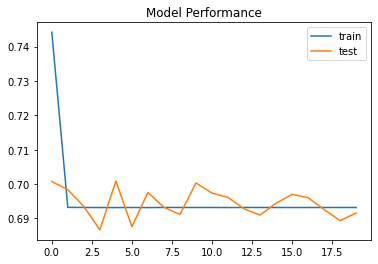

In [36]:
# plotting model performance
plt.title('Model Performance')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [37]:
# making dataframe to compare original value by model predicted value
data = {'Original Value' : y_test, 'Model Predicted Value' : y_pred}
final_data = pd.DataFrame(data)
final_data.head(10)

,Original Value,Model Predicted Value
43475,0,0
33587,0,0
19712,0,0
29590,0,0
26366,0,0
22472,0,0
7836,1,0
53702,0,0
55245,1,0
50956,0,0


**Saving Model For Development**

using pickle to save model on local drive

In [38]:
# Saves the model to Tensorflow SavedModel or a single HDF5 file
#model.save('my_model.h5')

In [39]:
# loading datasets
test = pd.read_csv("test.csv")

In [40]:
# retruns the first 5 head
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [41]:
# returns the dimensionality shape of the data
test.shape

(28913, 35)

In [42]:
# Drop specified labels from rows or columns.
test = test.drop(['ID', 'Loan Status'], axis=1)

In [43]:
# Encode target labels
test['Batch Enrolled'] = LabelEncoder().fit_transform(test['Batch Enrolled'])
test['Grade'] = LabelEncoder().fit_transform(test['Grade'])
test['Sub Grade'] = LabelEncoder().fit_transform(test['Sub Grade'])
test['Home Ownership'] = LabelEncoder().fit_transform(test['Home Ownership'])
test['Verification Status'] = LabelEncoder().fit_transform(test['Verification Status'])
test['Payment Plan'] = LabelEncoder().fit_transform(test['Payment Plan'])
test['Loan Title'] = LabelEncoder().fit_transform(test['Loan Title'])
test['Initial List Status'] = LabelEncoder().fit_transform(test['Initial List Status'])
test['Application Type'] = LabelEncoder().fit_transform(test['Application Type'])

In [44]:
# Scale features using statistics that are robust to outliers.
mn = MinMaxScaler()
# Fit to data, then transform it train data
new_fd = mn.fit_transform(test)

In [45]:
# Generates output predictions for the input samples.
pred_test = model.predict(new_fd)

In [46]:
Sub = []

for i in pred_test:
    if i > 0.5:
        Sub.append(1)
    else:
        Sub.append(0)


In [47]:
# creating dataframe
sub = pd.DataFrame(Sub, columns=['Loan Status'])

In [48]:
# saving to prediction to csv file
sub = sub.to_csv('submission.csv', index=False)

In [49]:
sub